# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

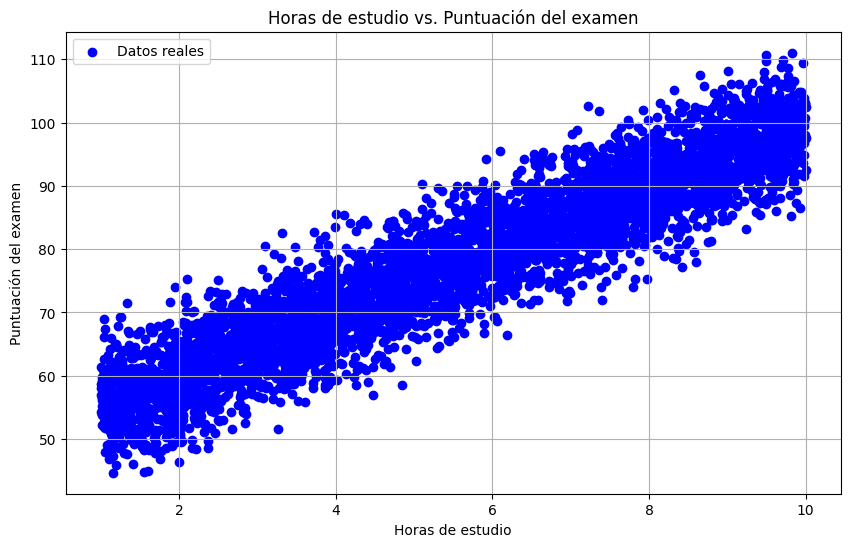

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST
X_train, X_med, y_train, y_med = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_med, y_med, test_size=0.5, random_state=42)
# A COMPLETAR

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 4000
Datos de Validación: 500
Datos de Test: 500


## Implementación manual de la regresión con gradiente descendente

In [12]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    n = len(y_true)
    cost = np.mean((y_true - y_pred) ** 2) / n
    return cost

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    # Inicializar los coeficientes (pesos) w y b
    w = 0  
    b = 0
    # Listas para almacenar las pérdidas de entrenamiento y validación por epoch
    train_loss_per_epoch = []
    val_loss_per_epoch = []
    # Bucle que itera por epoch

    for epoch in range(epochs):

        # Calcular y_pred del conjunto de entrenamiento
        y_pred_train = w * X_train + b

        # Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # Calcular los gradientes para los pesos w y b
        dw = (-2 / len(y_train)) * np.sum(X_train * (y_train - y_pred_train))
        db = (-2 / len(y_train)) * np.sum(y_train - y_pred_train)

        # Actualizar los pesos w y b
        w = w - lr * dw
        b = b - lr * db

        # Calcular y_pred del conjunto de validación
        y_pred_val = w * X_val + b

        # Calcular las pérdidas de validación y almacenarlas en una lista por epoch
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)


    return w, b, train_loss_per_epoch, val_loss_per_epoch

In [13]:
# Hiperparámetros
lr = 0.01  
epochs = 1000  

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

# Mostrar los resultados finales
print(f"Pesos finales: {w}")
print(f"Sesgo final: {b}")

Pesos finales: 5.201209038210091
Sesgo final: 48.563533994272284


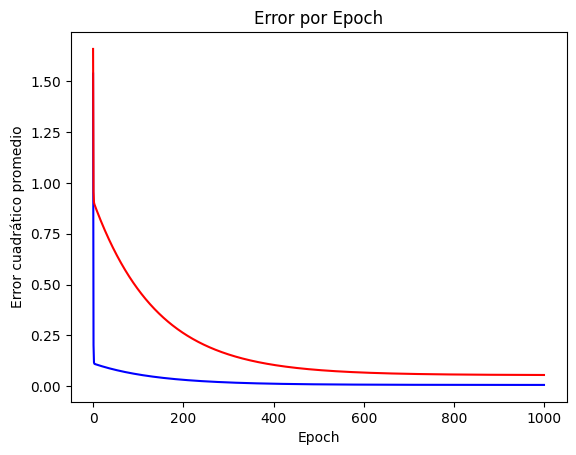

In [14]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 0.04794870077686786


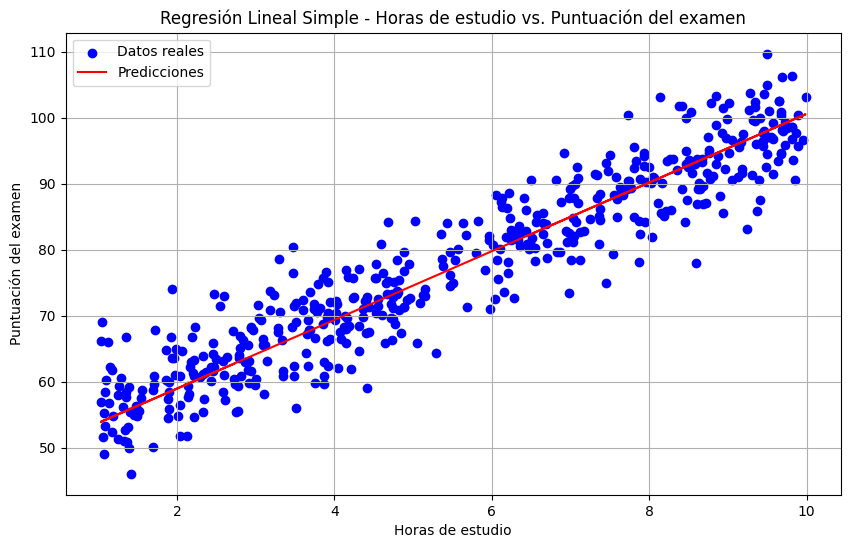

In [15]:
# Realizar predicciones en test
y_pred = X_test.dot(w) + b  

# Calcular el costo (Mean Squared Error) en el conjunto de test
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = cost_function(y_test, y_pred)  
mae = np.mean(np.abs(y_test - y_pred))  
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)) 
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 0.04794870077686786
MAE en el conjunto de test: 3.797033978534661
R^2 en el conjunto de test: 0.8802214959097939
MAPE en el conjunto de test: 5.067348931630593


## Implementación de la regresión lineal usando sklearn

In [18]:
X_train

array([7.43478697, 1.38222278, 1.35993522, ..., 6.98210851, 2.53344891,
       9.43405338])

In [21]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal con sklearn
model = LinearRegression()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

Costo del modelo: 23.446722805288243


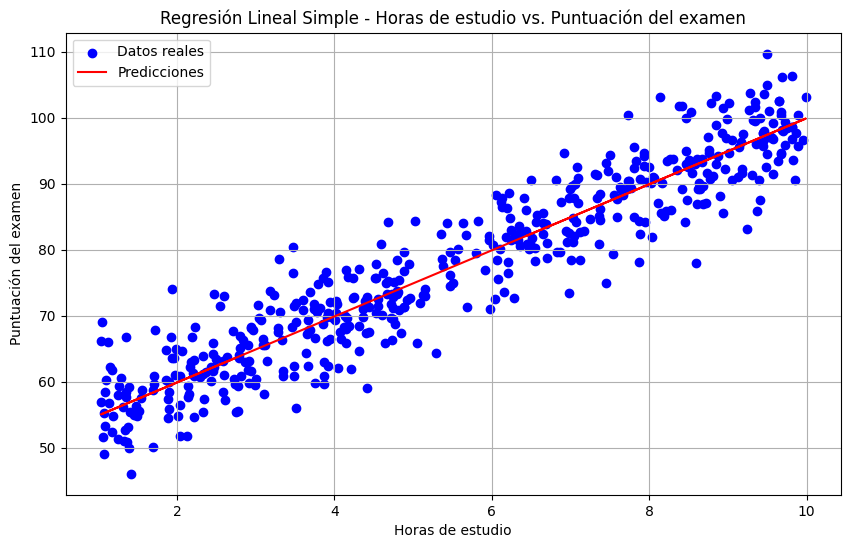

In [22]:
# Realizar predicciones en test
y_pred = model.predict(X_test)  

# Calcular el costo 
cost = np.mean((y_test - y_pred) ** 2)  

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')  # Puntos de datos reales
plt.plot(X_test, y_pred, color='red', label='Predicciones')  # Línea de regresión (predicciones)
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
mse = np.mean((y_train - model.predict(X_train)) ** 2)  
mae = np.mean(np.abs(y_train - model.predict(X_train)))  
r2 = model.score(X_train, y_train)  
mape = np.mean(np.abs((y_train - model.predict(X_train)) / y_train)) * 100  

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)

MSE en el conjunto de entrenamiento: 24.100594711126156
MAE en el conjunto de entrenamiento: 3.8958299799112948
R^2 en el conjunto de entrenamiento: 0.8744221509941871
MAPE en el conjunto de entrenamiento: 5.241928571833037


## Comparación de parámetros obtenidos

In [24]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 48.563533994272284
Coeficiente de pendiente (w) - Manual: 5.201209038210091
Coeficiente de intercepción (b) - Scikit-learn: 49.883537234215794
Coeficiente de pendiente (w) - Scikit-learn: 5.002940257756677
